# Chapter 6 - Working with CAS Tables

In [1]:
import swat

conn = swat.CAS('server-name.mycompany.com', 5570, 'username', 'password')

## Using CASTable Objects like a DataFrame

### CAS Table Introsspection

Let's compare a Pandas DataFrame to a CASTable.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/u/username/data/iris.csv')

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Now we'll load a CAS table.

In [5]:
tbl = conn.loadtable('data/iris.csv', caslib='casuser').casTable

NOTE: Cloud Analytic Services made the file data/iris.csv available as table DATA.IRIS in caslib CASUSER(username).


In [6]:
tbl.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Here are some side-by-side comparisons of methods of DataFrames and the same methods on CASTables.

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
tbl.dtypes

sepal_length     double
sepal_width      double
petal_length     double
petal_width      double
species         varchar
dtype: object

In [9]:
df.get_dtype_counts()

float64    4
object     1
dtype: int64

In [10]:
tbl.get_dtype_counts()

double     4
varchar    1
dtype: int64

Here are some other DataFrame methods being used on a CASTable object.

In [13]:
tbl.size

750

In [14]:
tbl.shape

(150, 5)

In [15]:
tbl.info()

CASTable('DATA.IRIS', caslib='CASUSER(username)')
Data columns (total 5 columns):
                N   Miss     Type
sepal_length  150  False   double
sepal_width   150  False   double
petal_length  150  False   double
petal_width   150  False   double
species       150  False  varchar
dtypes: double(4), varchar(1)
data size: 8450
vardata size: 1250
memory usage: 8536


In [16]:
tbl.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [17]:
tbl.tail(n=4)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.4,2.8,5.6,2.2,virginica
147,6.3,2.8,5.1,1.5,virginica
148,6.1,2.6,5.6,1.4,virginica
149,7.7,3.0,6.1,2.3,virginica


In [18]:
tbl.head(columns=['sepal_length', 'petal_length'])

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


### Computing Simple Statistics

In [20]:
desc = df.describe()
desc

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
type(desc)

pandas.core.frame.DataFrame

In [22]:
casdesc = tbl.describe()
casdesc

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
type(casdesc)

pandas.core.frame.DataFrame

In [24]:
# conn.tableinfo('datasources.megacorp5m')

In [25]:
# %time mega.describe()

Let's try the percentiles= option of the describe method.

In [26]:
tbl.describe(percentiles=[0.3, 0.8])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
30%,5.250000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.550000,3.400000,5.350000,1.900000
max,7.900000,4.400000,6.900000,2.500000


You can also filter the analyzed variables by type.

In [27]:
tbl.describe(include='character')

,species
count,150
unique,3
top,virginica
freq,50


In [28]:
tbl.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150,150,150,150,150
unique,35,23,43,22,3
top,5,3,1.5,0.2,virginica
freq,10,26,14,28,50
mean,5.84333,3.054,3.75867,1.19867,NaN
std,0.828066,0.433594,1.76442,0.763161,NaN
min,4.3,2,1,0.1,setosa
25%,5.1,2.8,1.6,0.3,NaN
50%,5.8,3,4.35,1.3,NaN
75%,6.4,3.3,5.1,1.8,NaN


In [29]:
tbl.describe(include=['numeric', 'character'])

,sepal_length,sepal_width,petal_length,petal_width,species
count,150,150,150,150,150
unique,35,23,43,22,3
top,5,3,1.5,0.2,virginica
freq,10,26,14,28,50
mean,5.84333,3.054,3.75867,1.19867,NaN
std,0.828066,0.433594,1.76442,0.763161,NaN
min,4.3,2,1,0.1,setosa
25%,5.1,2.8,1.6,0.3,NaN
50%,5.8,3,4.35,1.3,NaN
75%,6.4,3.3,5.1,1.8,NaN


The types of output can also be selected.

In [30]:
tbl.describe(stats=['count', 'nmiss', 'sum', 'probt', 'freq'])

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
nmiss,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sum,8.765000e+02,4.581000e+02,5.638000e+02,1.798000e+02
probt,3.331256e-129,4.374977e-129,1.994305e-57,3.209704e-42
freq,1.000000e+01,2.600000e+01,1.400000e+01,2.800000e+01


In [31]:
tbl.describe(stats='all')

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
unique,3.500000e+01,2.300000e+01,4.300000e+01,2.200000e+01
mean,5.843333e+00,3.054000e+00,3.758667e+00,1.198667e+00
std,8.280661e-01,4.335943e-01,1.764420e+00,7.631607e-01
min,4.300000e+00,2.000000e+00,1.000000e+00,1.000000e-01
25%,5.100000e+00,2.800000e+00,1.600000e+00,3.000000e-01
50%,5.800000e+00,3.000000e+00,4.350000e+00,1.300000e+00
75%,6.400000e+00,3.300000e+00,5.100000e+00,1.800000e+00
max,7.900000e+00,4.400000e+00,6.900000e+00,2.500000e+00
nmiss,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Individual statistics can be run independently.

In [32]:
tbl.count()

Column
sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
Name: NMiss, dtype: int64

In [33]:
tbl.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [34]:
tbl.probt()

sepal_length    3.331256e-129
sepal_width     4.374977e-129
petal_length     1.994305e-57
petal_width      3.209704e-42
dtype: float64

### Creating Plots from CASTable Data

In [35]:
%matplotlib inline

In [36]:
# from matplotlib.pyplot import show

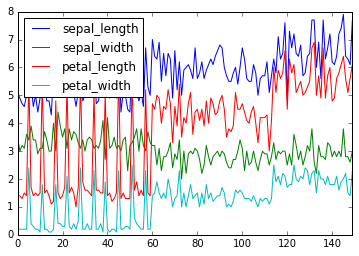

In [37]:
tbl.plot()

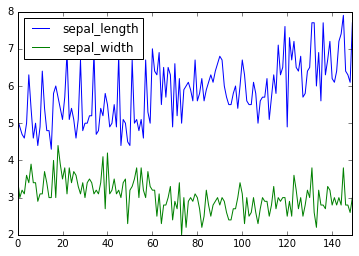

In [38]:
tbl[['sepal_length', 'sepal_width']].plot()

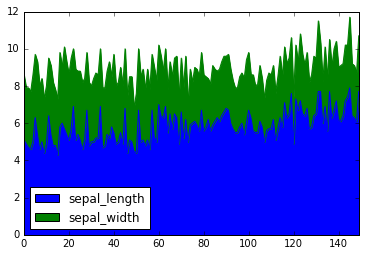

In [39]:
tbl[['sepal_length', 'sepal_width']].plot(kind='area')

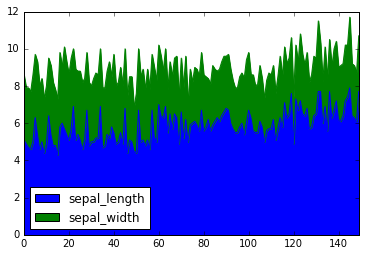

In [40]:
tbl[['sepal_length', 'sepal_width']].plot.area()

### Exporting CASTables to Other Formats

In [41]:
tbl.save(name='data/irisout.csv', caslib='casuser')

ERROR: The file /u/username/data/irisout.csv already exists. Specify the replace option to overwrite an existing file.
ERROR: The action stopped due to errors.


+ Elapsed: 0.0049s, user: 0.001s, sys: 0.003s, mem: 2.14mb

In [42]:
tbl.save(name='data/irisout.sashdat', caslib='casuser')

ERROR: The SASHDAT file /u/username/data/irisout.sashdat already exists. Specify the replace option to overwrite an existing file.
ERROR: The action stopped due to errors.


+ Elapsed: 0.000919s, user: 0.001s, mem: 0.134mb

## Sorting, Data Selection, and Iteration

### Fetching Data with a Sort Order

In [43]:
tbl.sort_values(['sepal_length', 'sepal_width'])

CASTable('DATA.IRIS', caslib='CASUSER(username)').sort_values(['sepal_length', 'sepal_width'])

In [45]:
sorttbl = tbl.sort_values(['sepal_length', 'sepal_width'])
sorttbl

CASTable('DATA.IRIS', caslib='CASUSER(username)').sort_values(['sepal_length', 'sepal_width'])

In [46]:
sorttbl.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.3,3.0,1.1,0.1,setosa
1,4.4,2.9,1.4,0.2,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setosa
4,4.5,2.3,1.3,0.3,setosa
5,4.6,3.1,1.5,0.2,setosa
6,4.6,3.2,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,4.6,3.6,1.0,0.2,setosa
9,4.7,3.2,1.6,0.2,setosa


In [47]:
sorttbl.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,7.7,2.6,6.9,2.3,virginica
146,7.7,2.8,6.7,2.0,virginica
147,7.7,3.0,6.1,2.3,virginica
148,7.7,3.8,6.7,2.2,virginica
149,7.9,3.8,6.4,2.0,virginica


In [49]:
sorttbl = tbl.sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])
sorttbl

CASTable('DATA.IRIS', caslib='CASUSER(username)').sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [50]:
sorttbl.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.9,3.8,6.4,2.0,virginica
1,7.7,2.6,6.9,2.3,virginica
2,7.7,2.8,6.7,2.0,virginica
3,7.7,3.0,6.1,2.3,virginica
4,7.7,3.8,6.7,2.2,virginica
5,7.6,3.0,6.6,2.1,virginica
6,7.4,2.8,6.1,1.9,virginica
7,7.3,2.9,6.3,1.8,virginica
8,7.2,3.0,5.8,1.6,virginica
9,7.2,3.2,6.0,1.8,virginica


### Iterating Through Columns and Rows

#### Basic Iteration

In [51]:
for col in sorttbl:
    print(col)

sepal_length
sepal_width
petal_length
petal_width
species


In [52]:
for i, col in enumerate(sorttbl):
    print(i, col)

0 sepal_length
1 sepal_width
2 petal_length
3 petal_width
4 species


In [53]:
for col, dtype in zip(sorttbl, sorttbl.dtypes):
    print(col, dtype)

sepal_length double
sepal_width double
petal_length double
petal_width double
species varchar


#### Iterating Over Columns

In [54]:
for col, obj in sorttbl.iteritems():
    print(col, obj)
    print('')

sepal_length CASColumn('DATA.IRIS', caslib='CASUSER(username)')['sepal_length'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

sepal_width CASColumn('DATA.IRIS', caslib='CASUSER(username)')['sepal_width'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

petal_length CASColumn('DATA.IRIS', caslib='CASUSER(username)')['petal_length'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

petal_width CASColumn('DATA.IRIS', caslib='CASUSER(username)')['petal_width'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

species CASColumn('DATA.IRIS', caslib='CASUSER(username)')['species'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])



In [55]:
for row in sorttbl.iterrows():
    print(row)

(0, sepal_length          7.9
sepal_width           3.8
petal_length          6.4
petal_width             2
species         virginica
Name: 0, dtype: object)
(1, sepal_length          7.7
sepal_width           2.6
petal_length          6.9
petal_width           2.3
species         virginica
Name: 1, dtype: object)
(2, sepal_length          7.7
sepal_width           2.8
petal_length          6.7
petal_width             2
species         virginica
Name: 2, dtype: object)
(3, sepal_length          7.7
sepal_width             3
petal_length          6.1
petal_width           2.3
species         virginica
Name: 3, dtype: object)
(4, sepal_length          7.7
sepal_width           3.8
petal_length          6.7
petal_width           2.2
species         virginica
Name: 4, dtype: object)
(5, sepal_length          7.6
sepal_width             3
petal_length          6.6
petal_width           2.1
species         virginica
Name: 5, dtype: object)
(6, sepal_length          7.4
sepal_width           

In [56]:
for row in sorttbl.itertuples():
    print(row)

(0, 7.9000000000000004, 3.7999999999999998, 6.4000000000000004, 2.0, 'virginica')
(1, 7.7000000000000002, 2.6000000000000001, 6.9000000000000004, 2.2999999999999998, 'virginica')
(2, 7.7000000000000002, 2.7999999999999998, 6.7000000000000002, 2.0, 'virginica')
(3, 7.7000000000000002, 3.0, 6.0999999999999996, 2.2999999999999998, 'virginica')
(4, 7.7000000000000002, 3.7999999999999998, 6.7000000000000002, 2.2000000000000002, 'virginica')
(5, 7.5999999999999996, 3.0, 6.5999999999999996, 2.1000000000000001, 'virginica')
(6, 7.4000000000000004, 2.7999999999999998, 6.0999999999999996, 1.8999999999999999, 'virginica')
(7, 7.2999999999999998, 2.8999999999999999, 6.2999999999999998, 1.8, 'virginica')
(8, 7.2000000000000002, 3.0, 5.7999999999999998, 1.6000000000000001, 'virginica')
(9, 7.2000000000000002, 3.2000000000000002, 6.0, 1.8, 'virginica')
(10, 7.2000000000000002, 3.6000000000000001, 6.0999999999999996, 2.5, 'virginica')
(11, 7.0999999999999996, 3.0, 5.9000000000000004, 2.100000000000000

### Techniques for Indexing and Selecting Data

#### Selecting Columns by Label and Position

In [57]:
col = sorttbl['sepal_width']
col

CASColumn('DATA.IRIS', caslib='CASUSER(username)')['sepal_width'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [58]:
col.head()

0    3.8
1    2.6
2    2.8
3    3.0
4    3.8
Name: sepal_width, dtype: float64

In [59]:
sorttbl.species

CASColumn('DATA.IRIS', caslib='CASUSER(username)')['species'].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [60]:
widths = sorttbl[['sepal_width', 'petal_width', 'species']]
widths

CASTable('DATA.IRIS', caslib='CASUSER(username)')[['sepal_width', 'petal_width', 'species']].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [61]:
widths.head()

,sepal_width,petal_width,species
0,3.8,2.0,virginica
1,2.6,2.3,virginica
2,2.8,2.0,virginica
3,3.0,2.3,virginica
4,3.8,2.2,virginica


In [62]:
widths.describe()

,sepal_width,petal_width
count,150.000000,150.000000
mean,3.054000,1.198667
std,0.433594,0.763161
min,2.000000,0.100000
25%,2.800000,0.300000
50%,3.000000,1.300000
75%,3.300000,1.800000
max,4.400000,2.500000


In [63]:
widths.columninfo()

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,sepal_width,2,double,8,12,0,0
1,petal_width,4,double,8,12,0,0
2,species,5,varchar,10,10,0,0


#### Selecting Data by Label and Position

In [64]:
sorttbl

CASTable('DATA.IRIS', caslib='CASUSER(username)').sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [65]:
sorttbl.loc[:, 'petal_width'].head()

0    2.0
1    2.3
2    2.0
3    2.3
4    2.2
Name: petal_width, dtype: float64

In [66]:
sorttbl.loc[:, 'sepal_length':'petal_length'].head()

,sepal_length,sepal_width,petal_length
0,7.9,3.8,6.4
1,7.7,2.6,6.9
2,7.7,2.8,6.7
3,7.7,3.0,6.1
4,7.7,3.8,6.7


In [67]:
sorttbl.loc[:, ['petal_width', 'sepal_width']].head()

,petal_width,sepal_width
0,2.0,3.8
1,2.3,2.6
2,2.0,2.8
3,2.3,3.0
4,2.2,3.8


In [68]:
sorttbl.loc[:, 3].head()

0    2.0
1    2.3
2    2.0
3    2.3
4    2.2
Name: petal_width, dtype: float64

In [69]:
sorttbl.iloc[:, 0:3].head()

,sepal_length,sepal_width,petal_length
0,7.9,3.8,6.4
1,7.7,2.6,6.9
2,7.7,2.8,6.7
3,7.7,3.0,6.1
4,7.7,3.8,6.7


In [70]:
sorttbl.iloc[:, [3, 1]].head()

,petal_width,sepal_width
0,2.0,3.8
1,2.3,2.6
2,2.0,2.8
3,2.3,3.0
4,2.2,3.8


In [71]:
sorttbl.ix[:, [3, 'sepal_width']].head()

,petal_width,sepal_width
0,2.0,3.8
1,2.3,2.6
2,2.0,2.8
3,2.3,3.0
4,2.2,3.8


In [72]:
sorttbl.ix[:, 'sepal_width'].head()

0    3.8
1    2.6
2    2.8
3    3.0
4    3.8
Name: sepal_width, dtype: float64

In [73]:
sorttbl.ix[:, 'sepal_width':-2].head()

,sepal_width,petal_length
0,3.8,6.4
1,2.6,6.9
2,2.8,6.7
3,3.0,6.1
4,3.8,6.7


In [74]:
sorttbl.ix[:, ['sepal_width', 3, 4]].head()

,sepal_width,petal_width,species
0,3.8,2.0,virginica
1,2.6,2.3,virginica
2,2.8,2.0,virginica
3,3.0,2.3,virginica
4,3.8,2.2,virginica


#### Dynamic Data Selection

In [75]:
expr = sorttbl.petal_length > 6.5

In [76]:
expr.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: _gt_0_, dtype: float64

In [79]:
newtbl = sorttbl[expr]
newtbl.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.6,6.9,2.3,virginica
1,7.7,2.8,6.7,2.0,virginica
2,7.7,3.8,6.7,2.2,virginica
3,7.6,3.0,6.6,2.1,virginica


In [80]:
newtbl = sorttbl[sorttbl.petal_length > 6.5]
newtbl.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.6,6.9,2.3,virginica
1,7.7,2.8,6.7,2.0,virginica
2,7.7,3.8,6.7,2.2,virginica
3,7.6,3.0,6.6,2.1,virginica


In [81]:
newtbl2 = newtbl[newtbl.petal_width < 2.2]
newtbl2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.8,6.7,2.0,virginica
1,7.6,3.0,6.6,2.1,virginica


sorttbl[(sorttbl.petal_length > 6.5) & 
        (sorttbl.petal_width < 2.2)].head()

In [83]:
sorttbl[(sorttbl.petal_length > 6.5) & 
        (sorttbl.petal_width < 2.2)]

CASTable('DATA.IRIS', caslib='CASUSER(username)', computedvars=['_gt_6_', '_and_8_', '_lt_7_'], computedvarsprogram='_gt_6_ = (petal_length > 6.5); _lt_7_ = (petal_width < 2.2); _and_8_ = (_gt_6_ and _lt_7_); ', where='(_and_8_)')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']].sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [84]:
sorttbl[(sorttbl.petal_length + sorttbl.petal_width) * 2 > 17.5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.6,6.9,2.3,virginica
1,7.7,3.8,6.7,2.2,virginica


In [85]:
sorttbl[sorttbl.species.str.upper().str.startswith('SET')].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,setosa
1,5.7,3.8,1.7,0.3,setosa
2,5.7,4.4,1.5,0.4,setosa
3,5.5,3.5,1.3,0.2,setosa
4,5.5,4.2,1.4,0.2,setosa


## Data Wrangling on the Fly

### Creating Computed Columns

In [87]:
sorttbl['sepal_factor'] = ((sorttbl.sepal_length + sorttbl.sepal_width) * 2)
sorttbl.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_factor
0,7.9,3.8,6.4,2.0,virginica,23.4
1,7.7,2.6,6.9,2.3,virginica,20.6
2,7.7,2.8,6.7,2.0,virginica,21.0
3,7.7,3.0,6.1,2.3,virginica,21.4
4,7.7,3.8,6.7,2.2,virginica,23.0


In [88]:
sorttbl['total_factor'] = sorttbl.sepal_factor + sorttbl.petal_width + sorttbl.petal_length
sorttbl.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_factor,total_factor
0,7.9,3.8,6.4,2.0,virginica,23.4,31.8
1,7.7,2.6,6.9,2.3,virginica,20.6,29.8
2,7.7,2.8,6.7,2.0,virginica,21.0,29.7
3,7.7,3.0,6.1,2.3,virginica,21.4,29.8
4,7.7,3.8,6.7,2.2,virginica,23.0,31.9


In [89]:
sorttbl['names'] = 'sepal / petal'
sorttbl.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_factor,total_factor,names
0,7.9,3.8,6.4,2.0,virginica,23.4,31.8,sepal / petal
1,7.7,2.6,6.9,2.3,virginica,20.6,29.8,sepal / petal
2,7.7,2.8,6.7,2.0,virginica,21.0,29.7,sepal / petal
3,7.7,3.0,6.1,2.3,virginica,21.4,29.8,sepal / petal
4,7.7,3.8,6.7,2.2,virginica,23.0,31.9,sepal / petal


In [90]:
sorttbl['cap_names'] = sorttbl.names.str.title()
sorttbl.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_factor,total_factor,names,cap_names
0,7.9,3.8,6.4,2.0,virginica,23.4,31.8,sepal / petal,Sepal / Petal
1,7.7,2.6,6.9,2.3,virginica,20.6,29.8,sepal / petal,Sepal / Petal
2,7.7,2.8,6.7,2.0,virginica,21.0,29.7,sepal / petal,Sepal / Petal
3,7.7,3.0,6.1,2.3,virginica,21.4,29.8,sepal / petal,Sepal / Petal
4,7.7,3.8,6.7,2.2,virginica,23.0,31.9,sepal / petal,Sepal / Petal


### By Groups

Specifying groupings explicitly on the CASTable object.

In [91]:
tbl.set_param('groupby', ['species'])
tbl

CASTable('DATA.IRIS', caslib='CASUSER(username)', groupby=['species'])

In [92]:
tbl.summary(subset=['min', 'max'])

,species,species_f,_key_
0,setosa,setosa,setosa
1,versicolor,versicolor,versicolor
2,virginica,virginica,virginica
,Column,Min,Max
species,,,
setosa,sepal_length,4.3,5.8
setosa,sepal_width,2.3,4.4
setosa,petal_length,1.0,1.9
setosa,petal_width,0.1,0.6
,Column,Min,Max


In [93]:
tbl.del_param('groupby')
tbl

CASTable('DATA.IRIS', caslib='CASUSER(username)')

Using the DataFrame method of specifying by groups.

In [94]:
grptbl = tbl.groupby(['species'])
grptbl

In [95]:
grptbl.summary(subset=['min', 'max'])

,species,species_f,_key_
0,setosa,setosa,setosa
1,versicolor,versicolor,versicolor
2,virginica,virginica,virginica
,Column,Min,Max
species,,,
setosa,sepal_length,4.3,5.8
setosa,sepal_width,2.3,4.4
setosa,petal_length,1.0,1.9
setosa,petal_width,0.1,0.6
,Column,Min,Max


#### Concatenating By Groups

In [96]:
grpsumm = grptbl.summary(subset=['min', 'max'])
grpsumm.concat_bygroups()

,Column,Min,Max
species,,,
setosa,sepal_length,4.3,5.8
setosa,sepal_width,2.3,4.4
setosa,petal_length,1.0,1.9
setosa,petal_width,0.1,0.6
versicolor,sepal_length,4.9,7.0
versicolor,sepal_width,2.0,3.4
versicolor,petal_length,3.0,5.1
versicolor,petal_width,1.0,1.8
virginica,sepal_length,4.9,7.9


#### Selecting Result Keys by Table Name

In [97]:
grpcorr = grptbl.correlation()
grpcorr

[ByGroupInfo]

 ByGroupInfo
 
       species   species_f       _key_
 0      setosa      setosa      setosa
 1  versicolor  versicolor  versicolor
 2   virginica   virginica   virginica

[ByGroup1.CorrSimple]

 Summary Statistics in Correlation Analysis for DATA.IRIS
 
              Variable     N   Mean    Sum    StdDev  Minimum  Maximum
 species                                                              
 setosa   sepal_length  50.0  5.006  250.3  0.352490      4.3      5.8
 setosa    sepal_width  50.0  3.418  170.9  0.381024      2.3      4.4
 setosa   petal_length  50.0  1.464   73.2  0.173511      1.0      1.9
 setosa    petal_width  50.0  0.244   12.2  0.107210      0.1      0.6

[ByGroup1.Correlation]

 Pearson Correlation Coefficients for DATA.IRIS
 
              Variable  sepal_length  sepal_width  petal_length  petal_width
 species                                                                    
 setosa   sepal_length      1.000000     0.746780      0.263874     0.279092
 setosa    sepal_width      0.746780     1.000000      0.176695     0.279973
 setosa   petal_length      0.263874     0.176695      1.000000     0.306308
 setosa    petal_width      0.279092     0.279973      0.306308     1.000000

[ByGroup2.CorrSimple]

 Summary Statistics in Correlation Analysis for DATA.IRIS
 
                 Variable     N   Mean    Sum    StdDev  Minimum  Maximum
 species                                                                 
 versicolor  sepal_length  50.0  5.936  296.8  0.516171      4.9      7.0
 versicolor   sepal_width  50.0  2.770  138.5  0.313798      2.0      3.4
 versicolor  petal_length  50.0  4.260  213.0  0.469911      3.0      5.1
 versicolor   petal_width  50.0  1.326   66.3  0.197753      1.0      1.8

[ByGroup2.Correlation]

 Pearson Correlation Coefficients for DATA.IRIS
 
                 Variable  sepal_length  sepal_width  petal_length  petal_width
 species                                                                       
 versicolor  sepal_length      1.000000     0.525911      0.754049     0.546461
 versicolor   sepal_width      0.525911     1.000000      0.560522     0.663999
 versicolor  petal_length      0.754049     0.560522      1.000000     0.786668
 versicolor   petal_width      0.546461     0.663999      0.786668     1.000000

[ByGroup3.CorrSimple]

 Summary Statistics in Correlation Analysis for DATA.IRIS
 
                Variable     N   Mean    Sum    StdDev  Minimum  Maximum
 species                                                                
 virginica  sepal_length  50.0  6.588  329.4  0.635880      4.9      7.9
 virginica   sepal_width  50.0  2.974  148.7  0.322497      2.2      3.8
 virginica  petal_length  50.0  5.552  277.6  0.551895      4.5      6.9
 virginica   petal_width  50.0  2.026  101.3  0.274650      1.4      2.5

[ByGroup3.Correlation]

 Pearson Correlation Coefficients for DATA.IRIS
 
                Variable  sepal_length  sepal_width  petal_length  petal_width
 species                                                                      
 virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
 virginica   sepal_width      0.457228     1.000000      0.401045     0.537728
 virginica  petal_length      0.864225     0.401045      1.000000     0.322108
 virginica   petal_width      0.281108     0.537728      0.322108     1.000000

+ Elapsed: 0.00878s, user: 0.009s, sys: 0.004s, mem: 2.04mb

In [98]:
grpcorr.get_tables('Correlation')

[Pearson Correlation Coefficients for DATA.IRIS
 
              Variable  sepal_length  sepal_width  petal_length  petal_width
 species                                                                    
 setosa   sepal_length      1.000000     0.746780      0.263874     0.279092
 setosa    sepal_width      0.746780     1.000000      0.176695     0.279973
 setosa   petal_length      0.263874     0.176695      1.000000     0.306308
 setosa    petal_width      0.279092     0.279973      0.306308     1.000000,
 Pearson Correlation Coefficients for DATA.IRIS
 
                 Variable  sepal_length  sepal_width  petal_length  petal_width
 species                                                                       
 versicolor  sepal_length      1.000000     0.525911      0.754049     0.546461
 versicolor   sepal_width      0.525911     1.000000      0.560522     0.663999
 versicolor  petal_length      0.754049     0.560522      1.000000     0.786668
 versicolor   petal_width      0.5464

In [99]:
swat.concat(grpcorr.get_tables('Correlation'))

,Variable,sepal_length,sepal_width,petal_length,petal_width
species,,,,,
setosa,sepal_length,1.000000,0.746780,0.263874,0.279092
setosa,sepal_width,0.746780,1.000000,0.176695,0.279973
setosa,petal_length,0.263874,0.176695,1.000000,0.306308
setosa,petal_width,0.279092,0.279973,0.306308,1.000000
versicolor,sepal_length,1.000000,0.525911,0.754049,0.546461
versicolor,sepal_width,0.525911,1.000000,0.560522,0.663999
versicolor,petal_length,0.754049,0.560522,1.000000,0.786668
versicolor,petal_width,0.546461,0.663999,0.786668,1.000000
virginica,sepal_length,1.000000,0.457228,0.864225,0.281108


#### Selecting a Specific By Group

In [100]:
grpsumm.get_group(['versicolor'])

,Column,Min,Max
species,,,
versicolor,sepal_length,4.9,7.0
versicolor,sepal_width,2.0,3.4
versicolor,petal_length,3.0,5.1
versicolor,petal_width,1.0,1.8


In [101]:
grpsumm.get_group(species='versicolor')

,Column,Min,Max
species,,,
versicolor,sepal_length,4.9,7.0
versicolor,sepal_width,2.0,3.4
versicolor,petal_length,3.0,5.1
versicolor,petal_width,1.0,1.8


#### Handling Multiple Sets of By Groups

In [103]:
grpmdsumm = tbl.mdsummary(sets=[dict(groupby=['sepal_length']),
                                dict(groupby=['petal_length'])])

In [104]:
list(grpmdsumm.keys())

['ByGroupSet1.ByGroupInfo',
 'ByGroupSet1.ByGroup1.MDSummary',
 'ByGroupSet1.ByGroup2.MDSummary',
 'ByGroupSet1.ByGroup3.MDSummary',
 'ByGroupSet1.ByGroup4.MDSummary',
 'ByGroupSet1.ByGroup5.MDSummary',
 'ByGroupSet1.ByGroup6.MDSummary',
 'ByGroupSet1.ByGroup7.MDSummary',
 'ByGroupSet1.ByGroup8.MDSummary',
 'ByGroupSet1.ByGroup9.MDSummary',
 'ByGroupSet1.ByGroup10.MDSummary',
 'ByGroupSet1.ByGroup11.MDSummary',
 'ByGroupSet1.ByGroup12.MDSummary',
 'ByGroupSet1.ByGroup13.MDSummary',
 'ByGroupSet1.ByGroup14.MDSummary',
 'ByGroupSet1.ByGroup15.MDSummary',
 'ByGroupSet1.ByGroup16.MDSummary',
 'ByGroupSet1.ByGroup17.MDSummary',
 'ByGroupSet1.ByGroup18.MDSummary',
 'ByGroupSet1.ByGroup19.MDSummary',
 'ByGroupSet1.ByGroup20.MDSummary',
 'ByGroupSet1.ByGroup21.MDSummary',
 'ByGroupSet1.ByGroup22.MDSummary',
 'ByGroupSet1.ByGroup23.MDSummary',
 'ByGroupSet1.ByGroup24.MDSummary',
 'ByGroupSet1.ByGroup25.MDSummary',
 'ByGroupSet1.ByGroup26.MDSummary',
 'ByGroupSet1.ByGroup27.MDSummary',
 'ByGroup

In [105]:
grpmdsumm.get_set(1)

,sepal_length,sepal_length_f,_key_
0,5.0,5,5
1,6.0,6,6
2,7.0,7,7
3,4.3,4.3,4.3
4,4.4,4.4,4.4
5,4.5,4.5,4.5
6,4.6,4.6,4.6
7,4.7,4.7,4.7
8,4.8,4.8,4.8
9,4.9,4.9,4.9


In [106]:
grpmdsumm.get_set(1).concat_bygroups()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT
sepal_length,,,,,,,,,,,,,,,
5,sepal_length,5.0,5.0,10.0,0.0,5.000000,50.0,0.000000,0.000000,0.000000,250.00,0.000000,0.000000,NaN,NaN
5,sepal_width,2.0,3.6,10.0,0.0,3.120000,31.2,0.543241,0.171788,0.295111,100.00,2.656000,17.411580,18.161922,2.121189e-08
5,petal_length,1.2,3.5,10.0,0.0,1.840000,18.4,0.834266,0.263818,0.696000,40.12,6.264000,45.340551,6.974502,6.505533e-05
5,petal_width,0.2,1.0,10.0,0.0,0.430000,4.3,0.326769,0.103333,0.106778,2.81,0.961000,75.992719,4.161290,2.443024e-03
6,sepal_length,6.0,6.0,6.0,0.0,6.000000,36.0,0.000000,0.000000,0.000000,216.00,0.000000,0.000000,NaN,NaN
6,sepal_width,2.2,3.4,6.0,0.0,2.733333,16.4,0.471876,0.192642,0.222667,45.94,1.113333,17.263745,14.188635,3.131560e-05
6,petal_length,4.0,5.1,6.0,0.0,4.650000,27.9,0.403733,0.164823,0.163000,130.55,0.815000,8.682421,28.212059,1.047856e-06
6,petal_width,1.0,1.8,6.0,0.0,1.500000,9.0,0.268328,0.109545,0.072000,13.86,0.360000,17.888544,13.693064,3.726479e-05
7,sepal_length,7.0,7.0,1.0,0.0,7.000000,7.0,NaN,NaN,NaN,49.00,0.000000,NaN,NaN,NaN


## Close the Connection

In [107]:
conn.close()